In [2]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

CV_flag = False
DATAPATH = "data/digits.csv"
df = pd.read_csv(DATAPATH)
X = df.drop("label",axis=1).values
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
y = df["label"].values
labels = df["label"] 
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.2)

C:\Users\usami\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

C:\Users\usami\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [5]:
clf = svm.SVC()
clf.fit(X_train_lda,y_train)
y_pred = clf.predict(X_test_lda)
print(clf.score(X_test_lda,y_test))
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred, labels=range(10)))

0.5455
             precision    recall  f1-score   support

          0       0.80      0.71      0.75       194
          1       0.86      0.93      0.90       239
          2       0.59      0.53      0.56       202
          3       0.38      0.41      0.39       202
          4       0.48      0.65      0.55       170
          5       0.43      0.39      0.41       170
          6       0.49      0.53      0.51       199
          7       0.53      0.53      0.53       230
          8       0.37      0.35      0.36       202
          9       0.44      0.33      0.38       192

avg / total       0.55      0.55      0.54      2000

[[138   0   4   1   0   3  46   0   2   0]
 [  0 223   1   7   1   1   0   2   4   0]
 [  2   9 108  47   0   4   4   5  23   0]
 [  0   9  41  83   1   8   7  12  36   5]
 [  0   0   0   0 110   8   0  23   3  26]
 [  2   0   8   9   8  67  45   2  29   0]
 [ 30   1   9  14   0  29 106   1   9   0]
 [  1   5   2   2  34   2   0 122  14  48]
 [  0  11 

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    colors = ("red","blue","orange","cyan","green",
          "gray", "pink","yellow","brown","black")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    #for idx, cl in enumerate(np.unique(y)):
    #    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    #                alpha=0.8, c=cmap(idx),
    #                 label=cl)

No handles with labels found to put in legend.


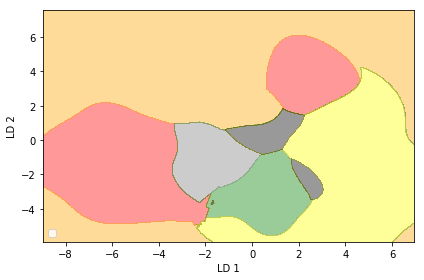

In [16]:
plot_decision_regions(X_train_lda, y_train, classifier=clf)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()